<a href="https://colab.research.google.com/github/DeepakKumarSingh003/Play-store-App-Review-EDA/blob/main/Play_Store_App_Review_EDA_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. </b>

## <b> Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.</b>

## <b> Explore and analyze the data to discover key factors responsible for app engagement and success. </b>

<b>First thing First</b>. 
Let Go through what we are about to do in this Google Colab Notebook.we are about to perform Exploratory Data Analysis(EDA).over a given data set.
<b>EDA</b>


<b>App Store</b>. 
App stores or app marketplaces are digital distribution platforms for mobile and desktop apps. They offer online users a plethora of apps to browse through, purchase or download for free - a concept that is proving increasingly successful around the world. 
Only In 2020, over 218 billion apps were downloaded worldwide and numbers are only going to increase.
DO you know there are 3.15Millions Apps available on Google App store.
and annual number of apps downloaded from Google play store is around 111.3 billion. Now Here comes the important part The gross app revenue of google play worldwide is 47.9 billion USD
And an Average consumer spend on mobile apps per smartphone as of 3rd quarter 2021(in U.S. dollars) 5.13USD.

Application Markets is very deep market to be dive in and take the precious pears out.for that we need users views for that companies use Application Review concept.

https://www.statista.com/topics/1729/app-stores/#dossierKeyfigures

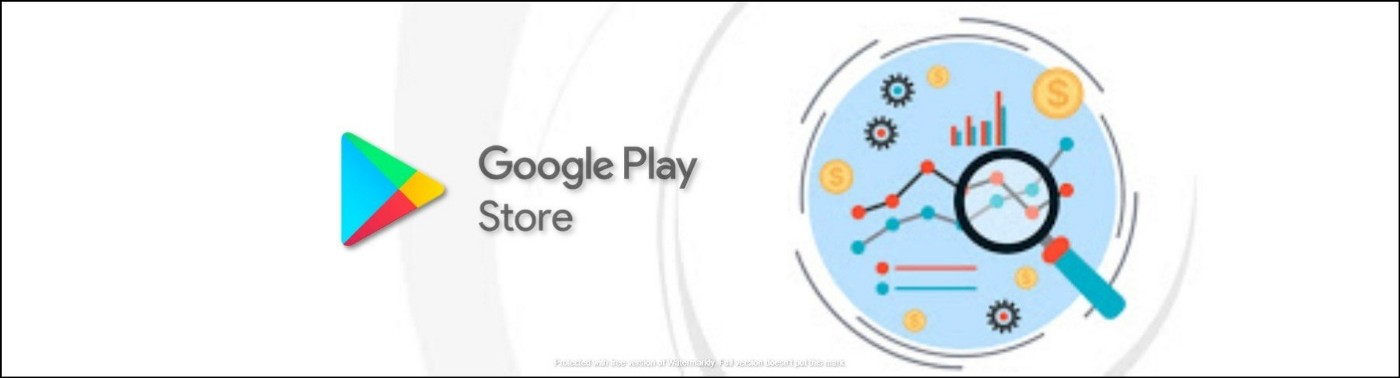

In [310]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style('whitegrid')
%lsmagic

Available line magics:
%alias  %alias_magic  %autocall  %automagic  %autosave  %bookmark  %cat  %cd  %clear  %colors  %config  %connect_info  %cp  %debug  %dhist  %dirs  %doctest_mode  %ed  %edit  %env  %gui  %hist  %history  %killbgscripts  %ldir  %less  %lf  %lk  %ll  %load  %load_ext  %loadpy  %logoff  %logon  %logstart  %logstate  %logstop  %ls  %lsmagic  %lx  %macro  %magic  %man  %matplotlib  %mkdir  %more  %mv  %notebook  %page  %pastebin  %pdb  %pdef  %pdoc  %pfile  %pinfo  %pinfo2  %pip  %popd  %pprint  %precision  %profile  %prun  %psearch  %psource  %pushd  %pwd  %pycat  %pylab  %qtconsole  %quickref  %recall  %rehashx  %reload_ext  %rep  %rerun  %reset  %reset_selective  %rm  %rmdir  %run  %save  %sc  %set_env  %shell  %store  %sx  %system  %tb  %tensorflow_version  %time  %timeit  %unalias  %unload_ext  %who  %who_ls  %whos  %xdel  %xmode

Available cell magics:
%%!  %%HTML  %%SVG  %%bash  %%bigquery  %%capture  %%debug  %%file  %%html  %%javascript  %%js  %%latex  %%perl 

In [ ]:
from google.colab import drive
drive.mount ('/content/drive')

Mounted at /content/drive


In [311]:
File1="/content/drive/MyDrive/Alma better Projects/EDA Capstone project/Play Store Data.csv"
File2="/content/drive/MyDrive/Alma better Projects/EDA Capstone project/Play store app User Reviews.csv"

In [312]:
store_df=pd.read_csv(File1)


In [313]:
Review_Df=pd.read_csv(File2)

To have a sucess in app making business a team of developers need to work and creat app keeping in mind the two different observations first is creat an app which will people prefer to install and use and use it with satisfaction. and other observation is to create an app with people use it with satisfacion and also ready to pay for the app as there are many apps free in market.

ok Then
lets search for the best conditions for our developers and make our app shine in market.

It is a good practice to understand the data first and try to gather as many insights from it. EDA is all about making sense of data in hand,before getting them dirty with it.

<b> Lets see what we have in our Play store App Data set.

In [ ]:
store_df.head()


In [ ]:
Review_Df.head()

<b>Lets have a Top View

In [ ]:
store_df.columns

In [ ]:
Review_Df.columns

<b>How big they are 

In [ ]:
store_df.shape

In [ ]:
Review_Df.shape

<b>Dive Deep in it.

In [ ]:
store_df.info()

In [ ]:
Review_Df.info()

<b>Dive Deep with clearity

In [314]:
#Make a function for detail information.
def Detailed_info(DataFrame):
  '''This Function will give detailed information with clearity about the DataFrame it will provide:
      1.Columns name,2.Data type,3.Unique in Data frame,4.Total nulls,5.Not Nulls,6.Percentage of Nulls
  '''
#Insert columns in place of index  
  info = pd.DataFrame(index=DataFrame.columns)
#Inser Data type as dtype into  Dataframe in first place   
  info['dtype'] = DataFrame.dtypes
#Inser Unique elements into  Dataframe at second place    
  info['Unique'] = DataFrame.nunique()
#Inser NUll elements into  Dataframe at third place  
  info['Num_ofNullValues'] = DataFrame.isnull().sum()
#Inser Not NUll elements into  Dataframe at fourth place  
  info['Num_nonNullValues'] = DataFrame.count()
  return info


In [315]:
Detailed_info(store_df)

,dtype,Unique,Num_ofNullValues,Num_nonNullValues
App,object,9660,0,10841
Category,object,34,0,10841
Rating,float64,40,1474,9367
Reviews,object,6002,0,10841
Size,object,462,0,10841
Installs,object,22,0,10841
Type,object,3,1,10840
Price,object,93,0,10841
Content Rating,object,6,1,10840
Genres,object,120,0,10841


In [ ]:
Detailed_info(Review_Df)

<b>Create copy of Dataframe</b>:-Instead of operating directly on playstore_data and Review_data,we’ll operate on a copy of the dataframe.

This is often a smart thing to do before we perform a data wrangling technique.

A Fequently we want to test your code to make sure that it works properly before you operate on your data directly.
Also it Give us a power to select only those columns which are most neeeded. as per our motive.

In [316]:
df=store_df.copy()
df1=Review_Df.copy()

for the first part we will consider specific objects from ous data sets. 

In [317]:
Analyse_App=['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type','Price', 'Content Rating']
Analyse_sentiment_app=['App', 'Sentiment', 'Sentiment_Polarity','Sentiment_Subjectivity']

In [318]:
df=df[Analyse_App]
df1=df1[Analyse_sentiment_app]

#App
<b>Lets Start with our First object "App"</b>

Check and remove duplicates from both the App lists

In [319]:
df.duplicated(subset=["App"]).sum()
df1.duplicated(subset=["App"]).sum()

63221

In [320]:
#Remove dulipcates from both the App
df.drop_duplicates(subset=["App"],inplace=True)
df1.drop_duplicates(subset=["App"],inplace=True)

In [321]:
df1.describe()
df.describe()


,Rating
count,8197.000000
mean,4.175052
std,0.561026
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


<b>It seems as we have big mess in the Rating

#Outliars
<b>Rating of any app can only range  from 1 to 5.still we can see there </b>

1.<b>There is amaximum value of 19.0. This is a outliar</b>
Outlier is a data-item/object that deviates significantly from the rest of the (so-called normal)objects. They can be caused by measurement or execution errors.
To deal with outliar we have to analyse our data.The analysis for outlier detection is referred to as outlier mining.mining!! yes you heard it right mining it is not the way done with coal field but the concept is same we have digg out where outliars are available in our data and then we have opeations to remove them.
Lets start the hunt for outliars. Always Remember when you are going for a hunt always have tools with you.There are lots of tool available you can choose from your convinience. 
we are using a very famous tool boxplot to detect those messy outliars 



*<b>We got our creepy creature messing our data</b>
 

                                           App  ... Content Rating
10472  Life Made WI-Fi Touchscreen Photo Frame  ...            NaN

[1 rows x 9 columns]


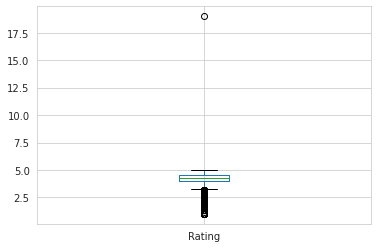

In [322]:
df.boxplot(["Rating"]);
print(df[df.Rating>5]);

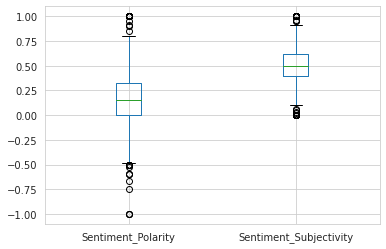

In [323]:

df1.boxplot();

<b> We have drop this creepy Row with outliar.it is not much usefull to us.

In [324]:
df.drop([10472], inplace=True)

<b>Now lets check how Rating looks like

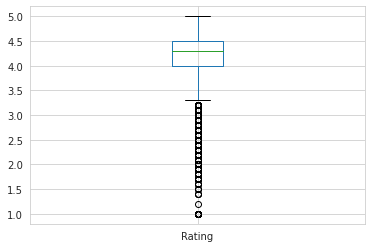

In [325]:
df.boxplot(["Rating"]);

<b>Its time to move ahead and hunt down the nulls in our data set. We have Nulls in:-</b>
*Rating,Type,Current Ver,and Android Ver*


In [ ]:
Detailed_info(df)

,dtype,Unique,Num_ofNullValues,Num_nonNullValues
App,object,9659,0,9659
Category,object,33,0,9659
Rating,float64,39,1463,8196
Reviews,object,5330,0,9659
Size,object,461,0,9659
Installs,object,21,0,9659
Type,object,2,1,9658
Price,object,92,0,9659
Content Rating,object,6,0,9659


In [ ]:
Detailed_info(df1)

,dtype,Unique,Num_ofNullValues,Num_nonNullValues
App,object,1074,0,1074
Sentiment,object,3,433,641
Sentiment_Polarity,float64,455,433,641
Sentiment_Subjectivity,float64,412,433,641


The Nulls in Sentiment,sentiment_polarity,sentiment_subjectivity are impresive they can be droped

In [326]:
df1.dropna(inplace=True)

In [ ]:
Detailed_info(df1)

,dtype,Unique,Num_ofNullValues,Num_nonNullValues
App,object,641,0,641
Sentiment,object,3,0,641
Sentiment_Polarity,float64,455,0,641
Sentiment_Subjectivity,float64,412,0,641


The Nulls in Rating lets go for them and try to find if they can be converted to mean median, mode or they also want to go out of the door.

In [ ]:
df["Rating"].mean()
df["Rating"].median()
# df["Rating"].mode()

4.3

mean median mode for 'Rating" can pull the Apps with no Rating to 4 and above. we dont want to take risk for 1463 App to manipulate our decision based to nothing.
sorry "Null in Rating".

In [327]:
df.dropna(subset=["Rating"],inplace=True)

In [328]:
Detailed_info(df)

,dtype,Unique,Num_ofNullValues,Num_nonNullValues
App,object,8196,0,8196
Category,object,33,0,8196
Rating,float64,39,0,8196
Reviews,object,5321,0,8196
Size,object,414,0,8196
Installs,object,19,0,8196
Type,object,2,0,8196
Price,object,73,0,8196
Content Rating,object,6,0,8196


In [ ]:
df.Reviews.unique()

array(['159', '967', '87510', ..., '603', '1195', '398307'], dtype=object)

In [329]:
#convert reviews to int type
df["Reviews"]=df["Reviews"].astype(int)

In [ ]:
df.Reviews.unique()
Detailed_info(df)

,dtype,Unique,Num_ofNullValues,Num_nonNullValues
App,object,8196,0,8196
Category,object,33,0,8196
Rating,float64,39,0,8196
Reviews,int64,5321,0,8196
Size,object,414,0,8196
Installs,object,19,0,8196
Type,object,2,0,8196
Price,object,73,0,8196
Content Rating,object,6,0,8196


#Size

In [ ]:
df.Size.unique()

<b>Size is realy very flilthy need some extract efforts to clean it.</b>

Size in MB and KB is represented as M and K and we also have "Varies with Device" at some points its a tricky task to clean it.lets get our hand dirty.
<b>we are also going to generate some Nulls here.</b>
be prepare for those also.

In [330]:
#convert "Varies with Device" into "NaN" , Replace other symbols and to change k(KB) into MB convert string with k to float & divide by 1024
df["Size"] = df['Size'].apply(lambda x: str(x).replace('Varies with device',"np.nan") if 'Varies with device' in str(x) else x)
df['Size'] = df['Size'].apply(lambda x: str(x).replace(',', '') if ',' in str(x) else x)
df['Size'] = df['Size'].apply(lambda x: str(x).replace('M', '') if 'M' in str(x) else x)
df['Size'] = df['Size'].apply(lambda x: float(str(x).replace('k', '')) / 1024 if 'k' in str(x) else x)


In [331]:
df["Size"] = df["Size"].apply(pd.to_numeric, errors='coerce')



Lets check if we can adjust them and will there be any major problem for us during last analysis

In [ ]:
df.Size.mean()
df.Size.median()
df.Size.mode()
df["Size"].max()
df["Size"].min()

0.00830078125

In [332]:
df["Size"]=df["Size"].round(3)
df.Size.unique()
df.Size.isnull().sum()


1169

ok we can mange you guys(NUlls generated during manipulation).but you all need to have the attire of median. Dont worry! we will assigne a special member to dress you up well. 

In [333]:
df["Size"] = df["Size"].fillna(df["Size"].median())

In [ ]:
Detailed_info(df)

,dtype,Unique,Num_ofNullValues,Num_nonNullValues
App,object,8196,0,8196
Category,object,33,0,8196
Rating,float64,39,0,8196
Reviews,int64,5321,0,8196
Size,float64,411,0,8196
Installs,object,19,0,8196
Type,object,2,0,8196
Price,object,73,0,8196
Content Rating,object,6,0,8196


#Installs

<b>Installs object have string with "," in between string and "+"at the end of string.lets manipulate it and convert to int type</b>

Installs also have some dirt but its easy to clean them up compared to what we have done with Sizze.


In [334]:
#lamda fuction to remove last part(+) using .rstrip().
df["Installs"]=df["Installs"].apply(lambda x:x.rstrip("+"))
df["Installs"]= pd.to_numeric(df["Installs"].map(lambda x:x.replace(",","")))


In [335]:
df["Installs"]=df["Installs"].astype(int)

In [ ]:
Detailed_info(df)

,dtype,Unique,Num_ofNullValues,Num_nonNullValues
App,object,8196,0,8196
Category,object,33,0,8196
Rating,float64,39,0,8196
Reviews,int64,5321,0,8196
Size,float64,411,0,8196
Installs,int64,19,0,8196
Type,object,2,0,8196
Price,object,73,0,8196
Content Rating,object,6,0,8196


#Type
It is good to go without any interuptions

In [ ]:
df.Type.unique()

array(['Free', 'Paid'], dtype=object)

#Price
Need some cleaning

<b>Price have string with "$" , "Everyone" in it.convert it to numeric type

In [ ]:
df.Price.unique()

array(['0', '$4.99', '$3.99', '$6.99', '$7.99', '$5.99', '$2.99', '$3.49',
       '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49', '$10.00',
       '$24.99', '$11.99', '$79.99', '$16.99', '$14.99', '$29.99',
       '$12.99', '$2.49', '$10.99', '$1.50', '$19.99', '$15.99', '$33.99',
       '$39.99', '$3.95', '$4.49', '$1.70', '$8.99', '$1.49', '$3.88',
       '$399.99', '$17.99', '$400.00', '$3.02', '$1.76', '$4.84', '$4.77',
       '$1.61', '$2.50', '$1.59', '$6.49', '$1.29', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$8.49', '$1.75', '$14.00', '$2.00',
       '$3.08', '$2.59', '$19.40', '$3.90', '$4.59', '$15.46', '$3.04',
       '$13.99', '$4.29', '$3.28', '$4.60', '$1.00', '$2.95', '$2.90',
       '$1.97', '$2.56', '$1.20'], dtype=object)

In [336]:
#Remane Peice to Price_Dolar
df.rename(columns={"Price":"Price_in_Dollar"},inplace=True)


In [337]:
df["Price_in_Dollar"]= df['Price_in_Dollar'].apply(lambda x: str(x).replace('Everyone',"np.nan") if 'Everyone' in str(x) else x)
df["Price_in_Dollar"]=df["Price_in_Dollar"].apply(lambda x: str(x).replace("$", ""))
df["Price_in_Dollar"]=df["Price_in_Dollar"].apply(lambda x: str(x).replace(",", ""))
df["Price_in_Dollar"]=df["Price_in_Dollar"].apply(lambda x: str(x).replace("$", ""))



In [338]:
df["Price_in_Dollar"] = df["Price_in_Dollar"].apply(pd.to_numeric, errors='coerce')

In [339]:
df["Price_in_Dollar"]=df["Price_in_Dollar"].fillna(df["Price_in_Dollar"].median())

In [ ]:
Detailed_info(df)

,dtype,Unique,Num_ofNullValues,Num_nonNullValues
App,object,8196,0,8196
Category,object,33,0,8196
Rating,float64,39,0,8196
Reviews,int64,5321,0,8196
Size,float64,411,0,8196
Installs,int64,19,0,8196
Type,object,2,0,8196
Price_in_Dollar,float64,73,0,8196
Content Rating,object,6,0,8196


In [340]:
df["Content Rating"].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated'], dtype=object)

In [203]:
store_df.Genres.u

array(['Art & Design', 'Art & Design;Pretend Play',
       'Art & Design;Creativity', 'Art & Design;Action & Adventure',
       'Auto & Vehicles', 'Beauty', 'Books & Reference', 'Business',
       'Comics', 'Comics;Creativity', 'Communication', 'Dating',
       'Education;Education', 'Education', 'Education;Creativity',
       'Education;Music & Video', 'Education;Action & Adventure',
       'Education;Pretend Play', 'Education;Brain Games', 'Entertainment',
       'Entertainment;Music & Video', 'Entertainment;Brain Games',
       'Entertainment;Creativity', 'Events', 'Finance', 'Food & Drink',
       'Health & Fitness', 'House & Home', 'Libraries & Demo',
       'Lifestyle', 'Lifestyle;Pretend Play',
       'Adventure;Action & Adventure', 'Arcade', 'Casual', 'Card',
       'Casual;Pretend Play', 'Action', 'Strategy', 'Puzzle', 'Sports',
       'Music', 'Word', 'Racing', 'Casual;Creativity',
       'Casual;Action & Adventure', 'Simulation', 'Adventure', 'Board',
       'Trivia', 'Role 

#Data Visualization
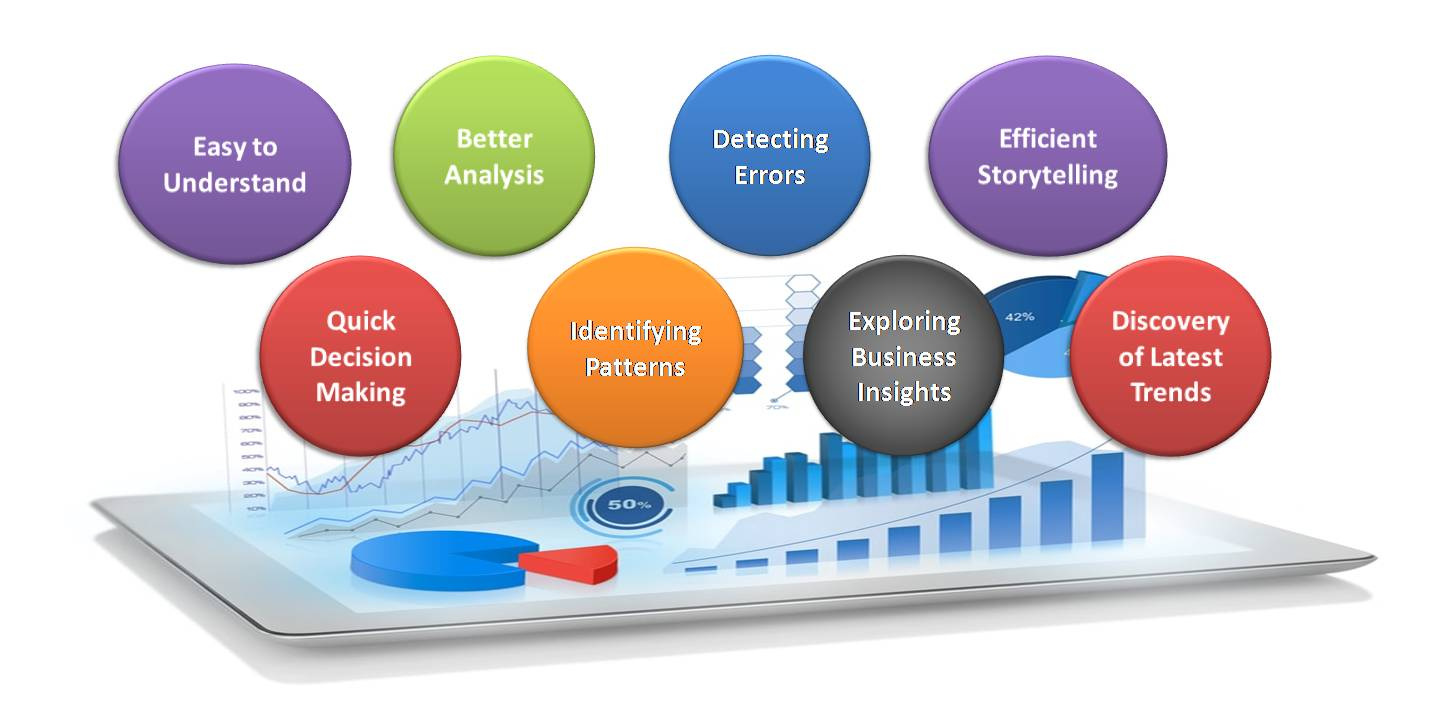

Category

Categories with Ratings

In [449]:
df.drop(["Rating_above3.5"],axis=1,inplace=True)

#Q. How many categories have paid Apps?
we can develop apps with highest paid categories and made them available to users at some minimum price.

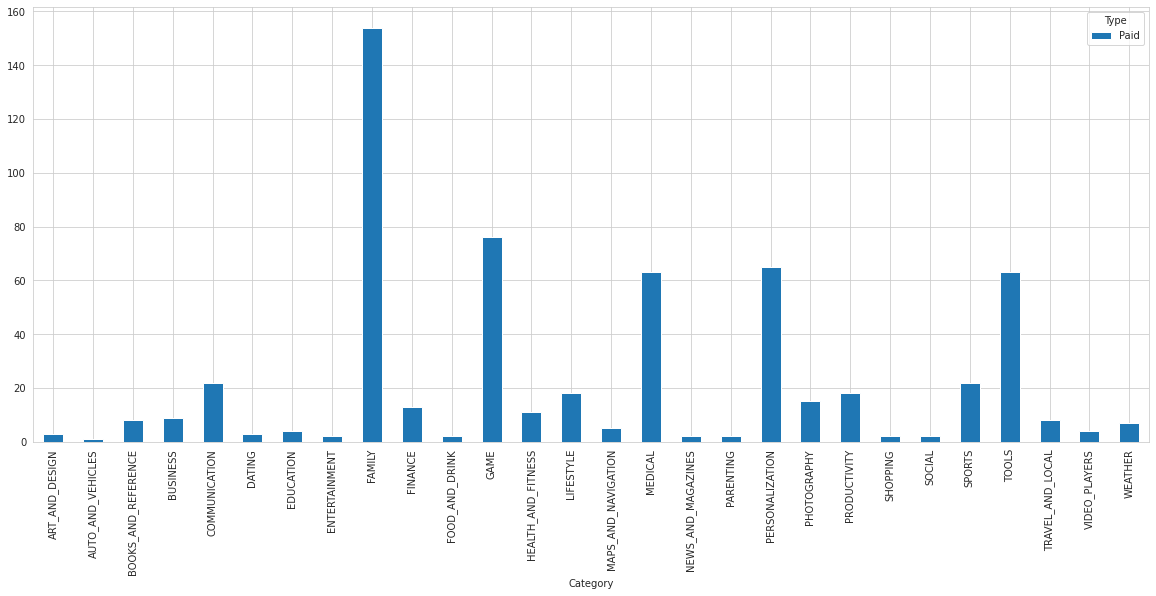

In [511]:
plt.rcParams['figure.figsize'] = (20, 8)
groups = df.groupby(['Category',df['Type'].loc[lambda x:x=="Paid"]]).size().unstack(fill_value=0).plot.bar()
# groups.plot.bar()
# x=df.groupby(["Type","Category"])
# x.first()

In [514]:
Detailed_info(df)

,dtype,Unique,Num_ofNullValues,Num_nonNullValues
App,object,8196,0,8196
Category,object,33,0,8196
Rating,float64,39,0,8196
Reviews,int64,5321,0,8196
Size,float64,411,0,8196
Installs,int64,19,0,8196
Type,object,2,0,8196
Price_in_Dollar,float64,73,0,8196
Content Rating,object,6,0,8196
Free,object,1,604,7592


In [ ]:
df.groupby()

let have a look What Graph says about category vs Installs

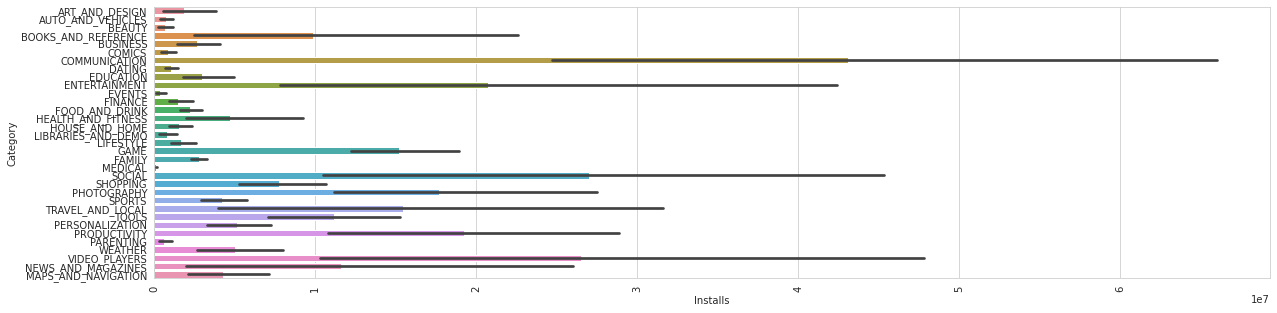

In [512]:
fig, ax = plt.subplots(figsize=(20,5))
sns.barplot(x='Installs', y='Category', data=df,ax=ax);
plt.xticks(rotation=90);

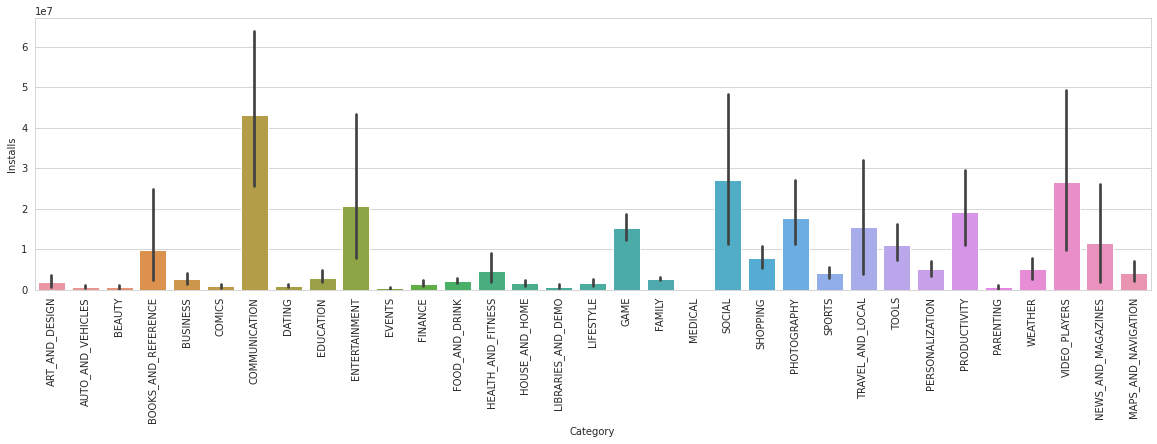

In [477]:
fig, ax = plt.subplots(figsize=(20,5))
sns.barplot(x='Category', y='Installs', data=df,ax=ax);
plt.xticks(rotation=90);

Text(0.5, 0, 'Categories')

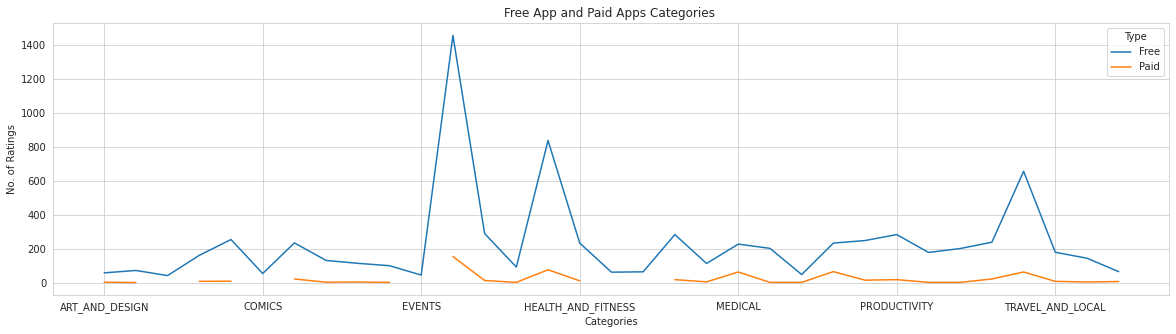

In [400]:
plt.rcParams['figure.figsize'] = (20, 5)
Categories_Free_Paid.plot()

plt.title('Free App and Paid Apps Categories ')
plt.ylabel('No. of Ratings')
plt.xlabel('Categories')

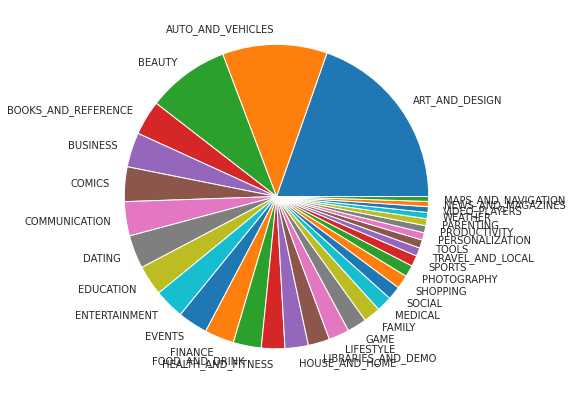

In [215]:
fig = plt.figure(figsize =(10, 7))
plt.pie(Different_Categories, labels=unique_Categories )

plt.show()

<b>Applications with Total Ratings 3.5 and above.

In [ ]:
Number_of_Ratings_for_Categories=df.groupby(["Category",df["Rating"].loc[lambda x : x>4]])["Rating"].count().unstack()
Number_of_Ratings_for_Categories


In [503]:
Number_of_Ratings_for_Categories.columns

Float64Index([4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5.0], dtype='float64', name='Rating')

Text(0.5, 0, 'Categories')

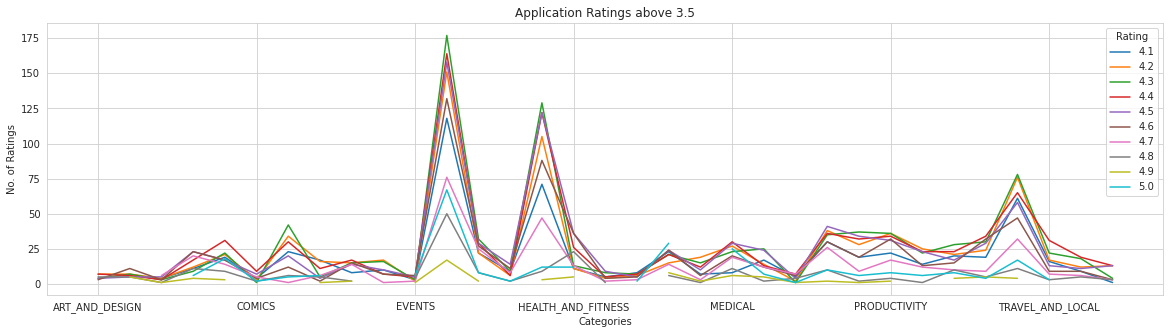

In [505]:
plt.rcParams['figure.figsize'] = (20, 5)
Number_of_Ratings_for_Categories.plot()

plt.title('Application Ratings above 3.5')
plt.ylabel('No. of Ratings')
plt.xlabel('Categories')


In [487]:
df.Installs.unique()

array([     10000,     500000,    5000000,   50000000,     100000,
            50000,    1000000,   10000000,       5000,  100000000,
       1000000000,       1000,  500000000,        100,        500,
               10,          5,         50,          1])

AxesSubplot(0.125,0.125;0.775x0.755)


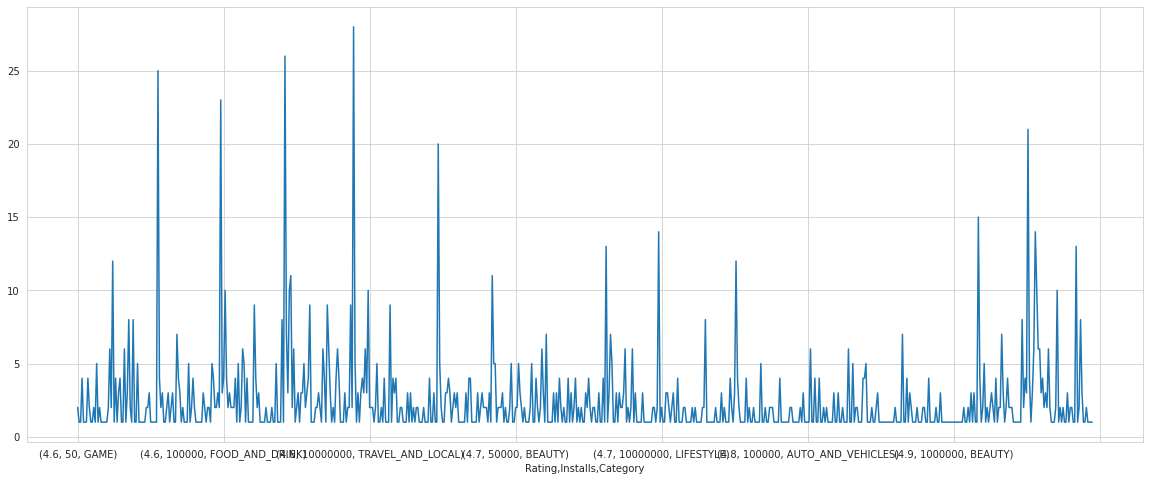

In [489]:
group1=df.groupby([df.Rating.loc[lambda x:x>4.5],"Installs","Category"])["Installs"].size().plot.line()
print(group1)

In [479]:
df.Rating.loc[lambda x:x>4.5].value_counts()

4.6    683
4.7    442
5.0    271
4.8    221
4.9     85
Name: Rating, dtype: int64

In [ ]:
plt.rcParams['figure.figsize']=(20,20)
size = store_df["Category"].value_counts()
size = store_df["Category"].value_counts()
labels = store_df["Category"].unique()
colors=["#43a6cc", "#bae4bf"]

plt.pie(size, labels=labels, colors=colors, autopct='%1.1f%%')
plt.show()

app size

In [ ]:
plt.rcParams['figure.figsize']=(10,5)
sns.distplot(df["Size"], color="#43a6cc")

What size should my app be

In [ ]:
plt.rcParams['figure.figsize']=(4,4)
medians = df.groupby(['Category'])['Size'].median().values
median_labels = [str(np.round(s, 2)) for s in medians]
ax = sns.boxplot(x="Size", y="Category", df=df, palette="GnBu")
store_df["Size"].mean()

ValueError: ignored

In [ ]:
# df["Rating"]==5


In [ ]:
# df.loc[df['Rating']==5,"App"]

In [ ]:
# kk=df.groupby("Category")

In [ ]:
# kk.first()

,App,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
Category,,,,,,,,,,,,
ART_AND_DESIGN,Photo Editor & Candy Camera & Grid & ScrapBook,5,159,19.0,10000,Free,0.00,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
AUTO_AND_VEHICLES,Monster Truck Stunt 3D 2019,5,367,25.0,100000,Free,0.00,Everyone,Auto & Vehicles,"May 10, 2018",1.0,4.0.3 and up
BEAUTY,Hush - Beauty for Everyone,5,18900,17.0,500000,Free,0.00,Everyone,Beauty,"August 2, 2018",6.10.1,5.0 and up
BOOKS_AND_REFERENCE,Wattpad 📖 Free Books,5,2914724,4.9,100000000,Free,0.00,Teen,Books & Reference,"August 1, 2018",Varies with device,Varies with device
BUSINESS,Visual Voicemail by MetroPCS,5,16129,29.0,10000000,Free,0.00,Everyone,Business,"July 30, 2018",Varies with device,Varies with device
COMICS,LINE WEBTOON - Free Comics,5,1013635,4.9,10000000,Free,0.00,Teen,Comics,"July 31, 2018",Varies with device,Varies with device
COMMUNICATION,Messenger – Text and Video Chat for Free,5,56642847,17.0,1000000000,Free,0.00,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device
DATING,"Moco+ - Chat, Meet People",5,1545,6.2,10000,Paid,3.99,Mature 17+,Dating,"June 19, 2018",2.6.139,4.1 and up
EDUCATION,Duolingo: Learn Languages Free,5,6289924,18.0,100000000,Free,0.00,Everyone,Education;Education,"August 1, 2018",Varies with device,Varies with device


In [ ]:
kk.get_group("WEATHER")

,App,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
3626,The Weather Channel: Rain Forecast & Storm Alerts,5,1558437,NaN,50000000,Free,0.0,Everyone,Weather,"August 1, 2018",Varies with device,Varies with device
3627,Weather forecast,5,159455,10.000000,1000000,Free,0.0,Everyone,Weather,"May 8, 2018",1.11.93,4.4 and up
3628,AccuWeather: Daily Forecast & Live Weather Rep...,5,2053404,NaN,50000000,Free,0.0,Everyone,Weather,"August 6, 2018",Varies with device,Varies with device
3629,Live Weather Pro,5,892,17.000000,10000,Free,0.0,Everyone,Weather,"July 17, 2018",1.1,4.4 and up
3630,"Weather by WeatherBug: Forecast, Radar & Alerts",5,981995,NaN,10000000,Free,0.0,Everyone,Weather,"June 7, 2018",Varies with device,Varies with device
...,...,...,...,...,...,...,...,...,...,...,...,...
10612,"Clearwater, FL - weather and more",5,0,3.900000,10,Free,0.0,Everyone,Weather,"April 12, 2018",1.0,5.0 and up
10625,"St. Petersburg, FL - weather and more",5,0,3.900000,10,Free,0.0,Everyone,Weather,"April 13, 2018",1.0,5.0 and up
10627,WSVN • South Florida's Source for Weather,5,7,28.000000,1000,Free,0.0,Everyone,Weather,"June 21, 2018",4.6.1404,4.4 and up
10713,My Earthquake Alerts - US & Worldwide Earthquakes,5,3471,NaN,100000,Free,0.0,Everyone,Weather,"July 24, 2018",Varies with device,Varies with device


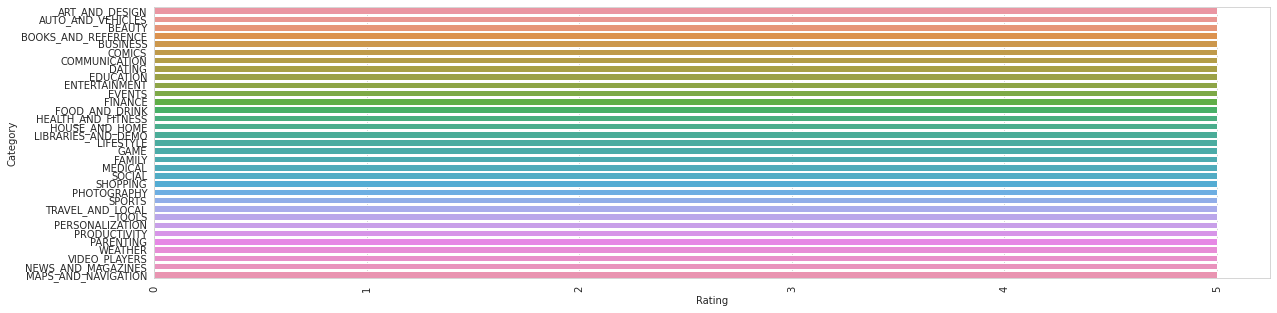

In [ ]:
fig, ax = plt.subplots(figsize=(20,5))
sns.barplot(x='Rating', y='Category', data=df,ax=ax);
plt.xticks(rotation=90);

In [ ]:
store_df["Last Updated"].value_counts

<bound method IndexOpsMixin.value_counts of 0         January 7, 2018
1        January 15, 2018
2          August 1, 2018
3            June 8, 2018
4           June 20, 2018
               ...       
10836       July 25, 2017
10837        July 6, 2018
10838    January 20, 2017
10839    January 19, 2015
10840       July 25, 2018
Name: Last Updated, Length: 10357, dtype: object>

In [ ]:
store_df["Last Updated"]=pd.to_numeric[store_df["Last Updated"]]

TypeError: ignored

In [ ]:
from datetime import datetime
from datetime import date

In [ ]:
# store_df['Last Updated']=store_df['Last Updated'].apply(lambda x : datetime.strptime(x,'%B %d, %y'))
store_df['Last Updated'].dt.strftime("%Y%m%d").astype(int)

AttributeError: ignored

In [ ]:
from datetime import date, datetime

for item in store_df['Last Updated']:
    st = datetime.strptime(item['start'], '%B %d, %y')

    if st.date() == date.today():
        item['start'] = st.time()

TypeError: ignored

In [ ]:
Review_Df=pd.read_csv(File2)

In [ ]:
Review_Df.shape

Review_Df.App.head(64295)

Detailed_info(Review_Df)

,dtype,Unique,Num_ofNullValues,Num_nonNullValues,percent_ofNullValues
App,object,1074,0,64295,0.000000
Translated_Review,object,27994,26868,37427,41.788631
Sentiment,object,3,26863,37432,41.780854
Sentiment_Polarity,float64,6195,26863,37432,41.780854
Sentiment_Subjectivity,float64,4530,26863,37432,41.780854


<b>As we can see there is lot of nulls avalaible in our Data Set and They are almost Same in numbers for all the major columns to be considered. Hence it is fisible to drop them

In [ ]:
Review_Df.dropna(inplace=True)

<b>And we are left with This much Data only

In [ ]:

Review_Df.describe()

<b>Before Diving Deep into this dataFrame lets have a brief idea about the terms sentiments,Sentiment_Polarity,Sentiment_Subjectivity. and why are they used in User Reviews on playstore App</b>
Its a Basic human tendency to  make a judgement or have a opinion about anything in there surrounding or anything within their range of contact.And these opinion may differ for different humans.but opinions may intersect for particular thing at a with some level of undestanding ,requirementsand availability.and this intersecting tendencies result into likes and dislikes.for example Python has able to become to much powerfull today because it is more easy to understant, there is a requirement for programming in this digital age and it is available for free of cost. hence it has able todevelop a positive sentiment in the minds of programmers.

Then what about neutral sentiment suppose a programmer is confirtable with other languages too then for him/her python will be like other languages.

what is negative sentiments then suppose a person who is new to coding and he/she is thrown with complex jargons from python and directly put into machine learning and NLP. it would creat a negative opion about programming and python.

That great
now wathat is sentiment polarity. it is basically a part of nlp in which we use the words from user to predict his/her sentiments like best ok worst bad poor dontlke it messi  good very goog Great Brilliant Excellent etc we can measure the sentiments.
Now question arises what it is doing in our data set.
so 
our data set is about the review of playstore application how much people like or dislike an app will is taken from total no. ratings given by user number of installion, sentiment of peoples toward that app and on compatability with latest version of handsets(latest update).
for example people of all age love to listen music hence spotify has develoed an app for listening music now listeners will install it use it loved the function and featurs rated the app with maximum stars. other people visit app store they look for apps with maximum stars (Rating) and install it. the number of installation increases hence the search engine optimiser pull the spotify at top.number of users increases directly propostional to happiness of app developers.

In [ ]:
Review_Df.columns

Index(['App', 'Translated_Review', 'Sentiment', 'Sentiment_Polarity',
       'Sentiment_Subjectivity'],
      dtype='object')

<b>In both files we have same name for Applications as "App". lets change the column name of "App" in File2(Review_Df) to "App1"

In [ ]:
Review_Df.rename(columns = {'App':'App1'}, inplace=True)

In [ ]:
Review_Df.columns

In [ ]:
App_in_File2=Review_Df["App1"]

Lets take out only the unique elements from App1.

In [ ]:
#Lets take out only the Unique elements from App1
individual_apps=Review_Df["App1"]

In [ ]:
unique_elem = set()
for index in individual_apps:
  unique_elem.add(index)
  # for genre in row['genres']:
  #   unique_genre.add(genre['name'])

In [ ]:
# pd.DataFrame(unique_elem,App_in_File1)
pd.DataFrame({'unique_elem': pd.Series(list(unique_elem)), 'App_in_File1': pd.Series(App_in_File1)})

,unique_elem,App_in_File1
0,Gyft - Mobile Gift Card Wallet,Photo Editor & Candy Camera & Grid & ScrapBook
1,Eurosport,Coloring book moana
2,Extreme Match,"U Launcher Lite – FREE Live Cool Themes, Hide ..."
3,FOX,Sketch - Draw & Paint
4,Diabetes:M,Pixel Draw - Number Art Coloring Book
...,...,...
10836,NaN,Sya9a Maroc - FR
10837,NaN,Fr. Mike Schmitz Audio Teachings
10838,NaN,Parkinson Exercices FR
10839,NaN,The SCP Foundation DB fr nn5n


In [ ]:
comman_app=[]
for ap in unique_elem:
  if ap in App_in_File1:
    comman_app.append(ap)

In [ ]:
len(comman_app)

0

In [ ]:
merged_LJ_df = pd.merge(App_in_File2,App_in_File1, how='left',left_on=App_in_File2,right_on=App_in_File1)

In [ ]:
merged_LJ_df

,key_0,App_x,App_y
0,10 Best Foods for You,10 Best Foods for You,10 Best Foods for You
1,10 Best Foods for You,10 Best Foods for You,10 Best Foods for You
2,10 Best Foods for You,10 Best Foods for You,10 Best Foods for You
3,10 Best Foods for You,10 Best Foods for You,10 Best Foods for You
4,10 Best Foods for You,10 Best Foods for You,10 Best Foods for You
...,...,...,...
60656,Housing-Real Estate & Property,Housing-Real Estate & Property,Housing-Real Estate & Property
60657,Housing-Real Estate & Property,Housing-Real Estate & Property,Housing-Real Estate & Property
60658,Housing-Real Estate & Property,Housing-Real Estate & Property,Housing-Real Estate & Property
60659,Housing-Real Estate & Property,Housing-Real Estate & Property,Housing-Real Estate & Property


In [ ]:
sucess_column = ["App",]

In [ ]:
Review_Df["App"].value_counts()

Bowmasters                        312
Helix Jump                        273
Angry Birds Classic               273
Calorie Counter - MyFitnessPal    254
Candy Crush Saga                  240
                                 ... 
Calculator - unit converter         1
Caller ID +                         1
Calendar+ Schedule Planner App      1
Apartment Decorating Ideas          1
Caf - Mon Compte                    1
Name: App, Length: 865, dtype: int64

In [ ]:
Review_Df["Sentiment_Polarity"].value_counts()

 0.000000    5158
 0.500000    1526
 0.700000     991
 1.000000     959
 0.200000     669
             ... 
-0.006667       1
 0.090545       1
 0.166349       1
-0.244141       1
-0.043132       1
Name: Sentiment_Polarity, Length: 6195, dtype: int64

In [ ]:
Review_Df["Sentiment_Subjectivity"].value_counts()

In [ ]:
Review_Df["Translated_Review"].value_counts()